# 1. Alignement, traitement et description des données

Fichier ulog_scheduler_0 :

- temps d'execution xtime ;

- variable d'horodatage timestamp qui permettra d'aligner les xtime avec les données de l'autre tableau ;

- variable event (qu'on va supprimer car elle nous sert pas encore)

ulog_sensor_combined_0 :

- timestamp ;

- 3 variables gyro_rad[0], gyro_rad[1], gyro_rad[2] : données de gyroscopes avec chacune des 3 dimensions ;

- 3 variables accelerometer_m_s2[0], accelerometer_m_s2[1], accelerometer_m_s2[2] : données d'accelerometres avec chacune des 3 dimensions ;

- à supprimer : gyro_integral_dt et accelerometer_integral_dt (inutiles), accelerometer_timestamp_relative et accelerometer_clipping (1 seule valeur).

In [6]:
# argument : un fichier csv
# cette fonction convertit fichier tableau csv to un dataframe
# elle retourne le dataframe avec ajustements
# sortie (en return) : un dataframe
def conversion(fichier):
    import pandas as pd
    # on met dans data on met un dataframe qui lit le csv, qu on trie par la colonne timestamp
    data = pd.DataFrame(pd.read_csv(fichier)).sort_values(by=['timestamp'],ignore_index=True)
        
    return data

In [7]:
# argument : un dataframe
# cette fonction va supprimer toutes les variables qui ont certains mots renseignes
# en plus de creer un dataframe nettoyé, elle retourne une description des changements
# sortie (en return) :
#  [0] un string
#  [1] un dataframe 

def suppression_variables_mot(data) :
    texte=""
    colonnes_a_supprimer=[]
    
    # pour chaque colonne danes les colonnes de data
    for colonne in data.columns :  
        
        # si il y a le mot event dans le nom de colonne
        if "event" in colonne or "integral" in colonne :
            # alors on met cette colonne dans la liste des colonnes_a_supprimer
            colonnes_a_supprimer.append(colonne)
    
    # si il n y a aucune colonne à supprimer
    if len(colonnes_a_supprimer)==0:
        # on met ça (et seulement ça) dans texte 
        texte="Aucun changement."
        
    # sinon (si des colonnes à supprimer)
    else: 
        # on met dans texte :
        #  ce qu il y avait deja
        #  et la liste des colonnes_a_supprimer
        texte=texte+ ", ".join(colonnes_a_supprimer)
        
    # on supprime ces colonnes
    data=data.drop(colonnes_a_supprimer, axis=1)
    
    return texte, data

# argument : un dataframe
# cette fonction supprime toutes les variables qui ont trop peu de valeurs differentes 
#  (on a choisi moins de 3)
# en plus de creer un dataframe nettoyé, elle retourne une description des changements
# sortie (en return) :
#  [0] un string
#  [1] un dataframe 
def suppression_variables_peu_de_valeurs(data) :
    texte=" "
    colonnes_a_supprimer=[]
    
    # pour chaque colonne dans les colonnes de data
    for colonne in data.columns :
        # si le nombre de valeurs differentes dedans ou si que des nan
        if len(np.unique(data[colonne])) <= 3 or  np.unique(np.isnan(data[colonne])):
            
            # alors on ajoute cette colonne a la liste des colonnes_a_supprimer
            colonnes_a_supprimer.append(colonne)
            
            # on met une ligne dans texte qui décrit le nombre de valeurs differentes de la variable supprimee
            texte = texte +"\nLa variable "+colonne+" avait "+ str(len(np.unique(data[colonne]))) +" valeur(s) differente(s)."

    # on enleve à data ces colonnes
    data=data.drop(colonnes_a_supprimer, axis=1)
    
    # on rajoute à texte ça :
    texte = texte+ "\nDistribution de chaque colonne restante :"
    
    # pour chaque colonne dans les colonnes de data
    for colonne in data.columns:
        
        # on met une ligne dans texte qui décrit le nombre de valeurs differentes de la variable supprimee
        texte = texte +"\nLa variable "+colonne+" a "+ str(len(np.unique(data[colonne]))) +" valeurs differentes."
    
    return texte, data

In [8]:
# argument : un dataframe
# cette fonction lance les differentes precedentes fonctions de tris :
#  - suppression_variables_mot
#  - suppression_variables_peu_de_valeurs
# en plus de creer un dataframe nettoyé, elle retourne une description des changements
# sortie (en return) :
#  [0] un string
#  [1] un dataframe 
def tri_total(data):
    texte=""
    # on ajoute a texte un titre et le texte de suppression_variables_mot
    texte=texte+"\n\nEtape de suppression de variable(s) qui ont certains noms :\n"
    texte=texte+suppression_variables_mot(data)[0]
    data=suppression_variables_mot(data)[1]
    
    # on ajoute a texte un titre et le texte de suppression_variables_peu_de_valeurs
    texte=texte+"\n\nEtape de suppression de variable(s) qui ont trop peu de valeurs differentes :"
    texte=texte+suppression_variables_peu_de_valeurs(data)[0]
    data=suppression_variables_peu_de_valeurs(data)[1]
    
    
    return texte, data

In [9]:
import pandas as pd
import numpy as np
for tableau in ["ulog_scheduler_0.csv",
                "ulog_sensor_combined_0.csv"] :
    texte=""
    if __name__ == "__main__":
        
        print("\n",str(tableau), " originel :")
        
        data=conversion(tableau)
        
        print("\nColonnes originelles :\n", data.columns)
        print(tri_total(data)[0])

        data=tri_total(data)[1]
        
        print("\n",str(tableau), " final (head) :")
        print(data.head())
        print("\nColonnes finales :\n", data.columns)


 ulog_scheduler_0.csv  originel :

Colonnes originelles :
 Index(['timestamp', 'xtime', 'event'], dtype='object')


Etape de suppression de variable(s) qui ont certains noms :
event

Etape de suppression de variable(s) qui ont trop peu de valeurs differentes : 
Distribution de chaque colonne restante :
La variable timestamp a 70395 valeurs differentes.
La variable xtime a 1012 valeurs differentes.

 ulog_scheduler_0.csv  final (head) :
   timestamp  xtime
0   15101432    194
1   15101629     60
2   15101692    117
3   15102433     32
4   15104433    173

Colonnes finales :
 Index(['timestamp', 'xtime'], dtype='object')

 ulog_sensor_combined_0.csv  originel :

Colonnes originelles :
 Index(['timestamp', 'gyro_rad[0]', 'gyro_rad[1]', 'gyro_rad[2]',
       'gyro_integral_dt', 'accelerometer_timestamp_relative',
       'accelerometer_m_s2[0]', 'accelerometer_m_s2[1]',
       'accelerometer_m_s2[2]', 'accelerometer_integral_dt',
       'accelerometer_clipping'],
      dtype='object')


Et

In [10]:
# arguments : 
#  -un fichier csv (ulog_sensor_combined_0)
#  -un fichier csv (ulog_scheduler_0)
# cette fonction va concatener les fichiers ulog_scheduler_0.csv et ulog_sensor_combined_0 passés en argument
# elle va permettre de faire correspondre des xtime avec des lignes de donnees en alignant des timestamp (differents)
# sortie (en return) : un dataframe

def concatenation(data_fichier_xtimes, data_fichier2):
    import pandas as pd
    import numpy as np
    
    # on met dans un objet data la concatenation de ulog_scheduler_0 avec le fichier csv passe en argument
    #  les 2 fichiers seront concatenes l un au dessus l autre
    #   mais ensuite on les trie par la variable timestamp dans l'ordre croissant
    data = pd.concat([data_fichier_xtimes, data_fichier2]).sort_values(by=['timestamp'], ignore_index=True)
    
    # on va chercher la premiere variable qui n a ni xtime ni timestamp dans son nom
    #  pour chaque colonne dans les colonnes de data
    for colonne in data.columns :
        # si on a ni le mot timestamp ni le mot xtime dans le nom de la colonne
        if ("timestamp" in colonne or "xtime" in colonne)==False :
            # alors on met dans la variable choix_variable cette variable
            choix_variable=colonne
            # on arrete la boucle des que ça arrive
            break
    
    # il faut mettre la variable timestamp dans une variable à part, qu'on va mettre en format numpy, sinon ça bug
    A=data["timestamp"].to_numpy()
    
    # pour chaque n°j jusqu a la fin de data
    for j in range(len(data)-1):
        
        # si dans une ligne n°j, sa variable ("choix_variable" choisie precedemment) n est pas vide
        #  et si sa ligne suivante (n°j+1) est vide
        if np.isnan(data[choix_variable][j]) == False and np.isnan(data[choix_variable][j+1]) == True:
            # alors on remplace le timestamp (dans A) de cette ligne (n°j+1) par le timestamp de la ligne n°j
            A[j+1] =A[j]
            
    
    # et donc on remet cette variable A (avec les timestamp changés) a la place de timestamp dans data
    data["timestamp"]=A
    
    # pour chaque groupe de timestamps egaux on garde seulement le premier, on supprime le reste
    #  on enleve l index
    data = data.groupby(['timestamp']).min().dropna().reset_index(inplace=False, 
                                                                  drop=True)
        
    # ces 2 etapes precedentes ont permis d ajouter un xtime aux lignes sans xtime
    #  c est a dire dans les lignes issues du tableau sans xtime on a mis le xtime de la ligne suivante 
    #   (les lignes ont ete rangee dans l ordre coissant des timestamp)
    
    return data

In [11]:
# argument : un dataframe
# cette fonction va supprimer la variable nommee timestamp dans le data de concatenation car on en a plus besoin
# sortie (en return) : un dataframe
def suppression_timestamp(data):
    # suppression de colonne(s) avec le mot timestamp dans le nom   
    for colonne in data.columns :    
        if ("timestamp" in colonne)==True :
            data=data.drop(colonne, axis=1)
            
    return data

In [12]:
# argument : un dataframe
# cette fonction normalise les donnees sauf xtime (la premiere colonne) entre 0 et 1
# sortie (en return) : un dataframe
def normalisation(data):
    from sklearn import preprocessing
    import pandas as pd
    
    # on met dans un objet (type pandas.core.indexes.base.Index) les colonnes de base
    col=data.columns
    
    # on met dans mms le modele MinMaxScaler de normalisation, une normalisation de 0 à 1
    mms=preprocessing.MinMaxScaler(feature_range=(0,1))
    
    # on applique ce modele de normalisation à partir de la 2 colonne jusqu'à la derniere et on remplace dans data
    data.values[:,1:]=mms.fit_transform(data.values[:,1:])
    
    # on remet data en dataframe en precisant en noms de colonnes les colonnes de base
    data=pd.DataFrame(data,columns=col)

    return data

In [13]:
# on met dans data la concatenation du fichier avec ulog_scheduler_0.csv
data=concatenation(tri_total(conversion("ulog_scheduler_0.csv"))[1],
                   tri_total(conversion("ulog_sensor_combined_0.csv"))[1])

# on lui supprime ses timestamp
data=suppression_timestamp(data)

# on normalise les colonnes (sauf xtime)
data=normalisation(data)

print(data.head())

   xtime  gyro_rad[0]  gyro_rad[1]  gyro_rad[2]  accelerometer_m_s2[0]  \
0   16.0     0.539389     0.628170     0.501068               0.464922   
1   50.0     0.539565     0.629149     0.500877               0.464798   
2  174.0     0.538653     0.628641     0.500543               0.464794   
3   19.0     0.536090     0.626586     0.500711               0.465495   
4  167.0     0.538545     0.627787     0.501683               0.464896   

   accelerometer_m_s2[1]  accelerometer_m_s2[2]  
0               0.542967               0.974114  
1               0.553677               0.974372  
2               0.556481               0.974337  
3               0.545574               0.974302  
4               0.533710               0.974070  


In [9]:
print(data.describe())

              xtime   gyro_rad[0]   gyro_rad[1]   gyro_rad[2]  \
count  10351.000000  10351.000000  10351.000000  10351.000000   
mean     150.498696      0.522105      0.648220      0.515068   
std      230.901346      0.119022      0.105857      0.229539   
min       10.000000      0.000000      0.000000      0.000000   
25%       32.000000      0.523617      0.620539      0.484492   
50%      131.000000      0.536906      0.628728      0.501230   
75%      177.000000      0.543499      0.653655      0.510377   
max     2002.000000      1.000000      1.000000      1.000000   

       accelerometer_m_s2[0]  accelerometer_m_s2[1]  accelerometer_m_s2[2]  
count           10351.000000           10351.000000           10351.000000  
mean                0.451353               0.504100               0.974165  
std                 0.018138               0.119264               0.012558  
min                 0.000000               0.000000               0.000000  
25%                 0.438880 

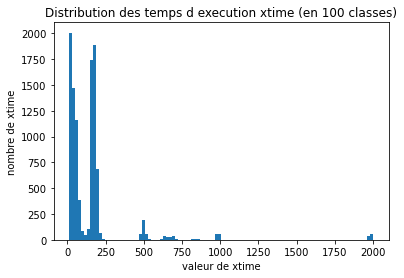

In [10]:
#Histogramme des xtimes
import matplotlib.pyplot as plt
import numpy as np
plt.hist(np.array(data["xtime"]),bins=100)
plt.xlabel("valeur de xtime")
plt.ylabel("nombre de xtime")
plt.title("Distribution des temps d execution xtime (en 100 classes)")
plt.show() 

Distribution de chaque variable gyro et accelerometer (normalisée)


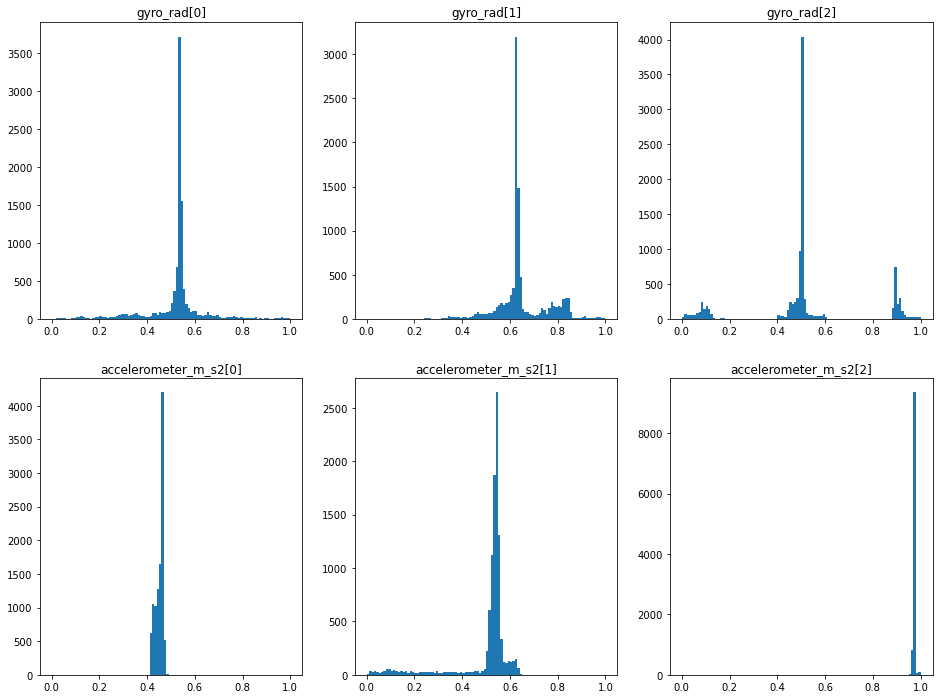

In [11]:
#Histogramme par variable
import matplotlib.pyplot as plt
import numpy as np

data_variables=data.copy()
data_variables=data_variables.drop(["xtime"], axis=1)

print("Distribution de chaque variable gyro et accelerometer (normalisée)")

place=0
plt.figure(figsize=(16,12))
for colonne in data_variables.columns :
    place=place+1
    plt.subplot(2,3,place)
    plt.hist(np.array(data_variables[colonne]),bins=100)
    plt.title(colonne)
plt.show()

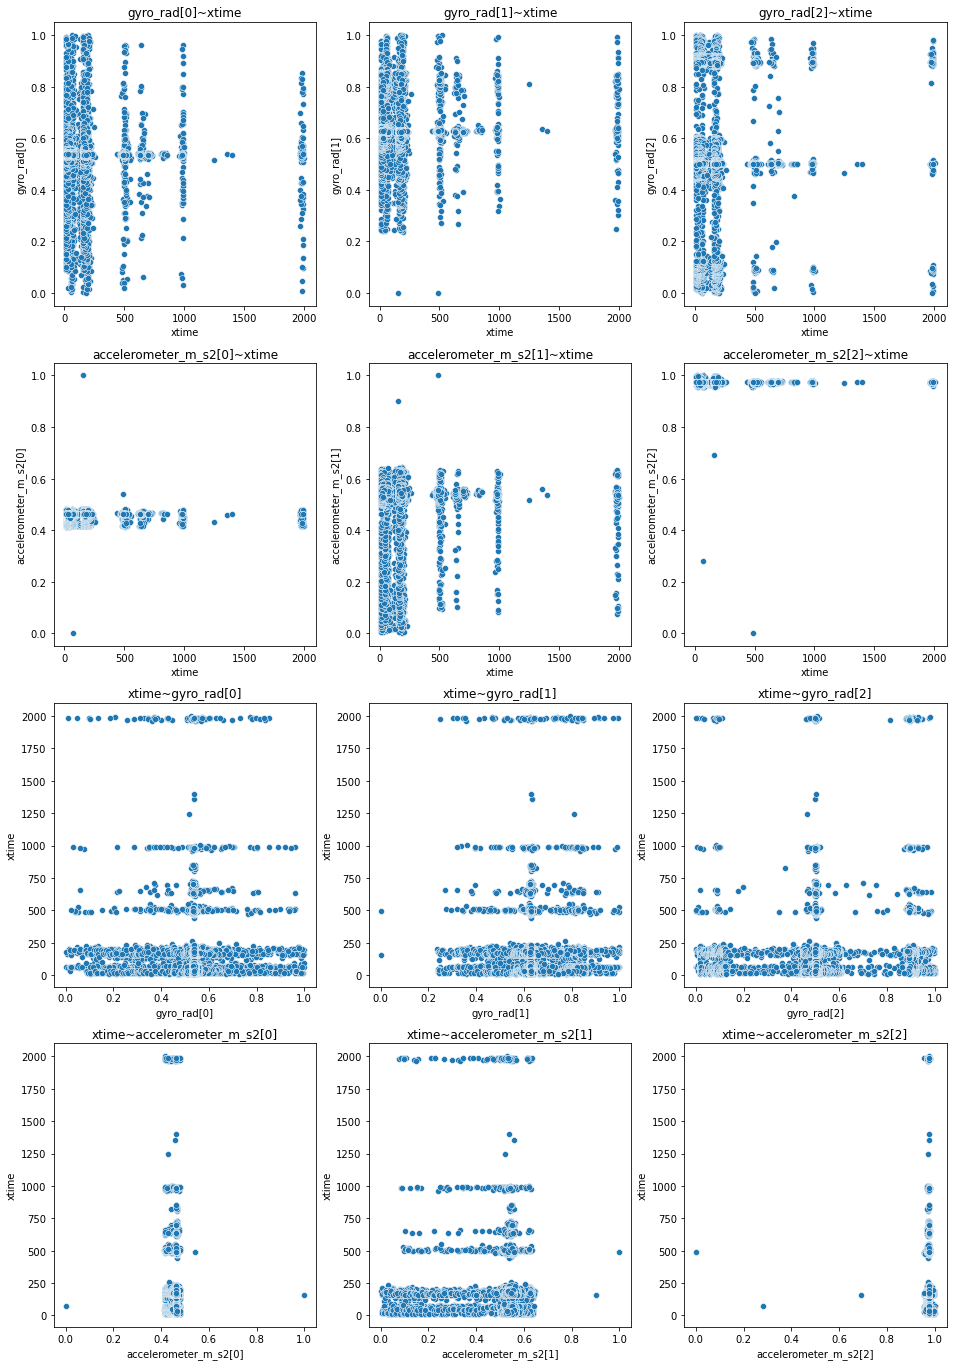

In [12]:
import seaborn

data_variables=data.copy()
data_variables=data_variables.drop(["xtime"], axis=1)

liste_colonnes=data_variables.columns

place=0
plt.figure(figsize=(16,24))
for colonne in liste_colonnes :
    place=place+1
    plt.subplot(4,3,place)
    seaborn.scatterplot(x="xtime",
                        y=colonne,
                        data=data)
    plt.title("".join([colonne,"~xtime"]))

for colonne in liste_colonnes :
    place=place+1
    plt.subplot(4,3,place)
    seaborn.scatterplot(x=colonne,
                        y="xtime",
                        data=data)
    plt.title("".join(["xtime~",colonne]))
plt.show()